<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/MongoDB/MongoDB_%EA%B0%9C%EB%85%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.mongodb.com/  
https://docs.mongodb.com/manual/  
https://www.mongodb.com/try/download/community


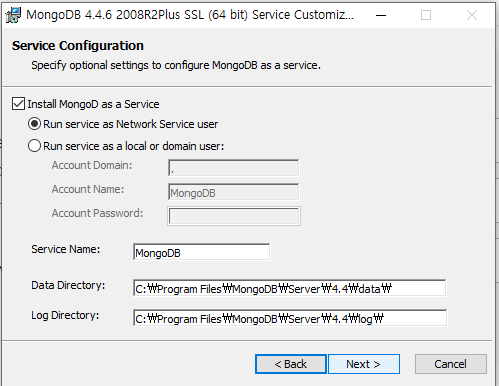

환경변수 - Path - C:\Program Files\MongoDB\Server\4.4\bin

- 복제를 해야 sharding(분할)했다고 함
- config server(환경설정/로그데이터)는 router 기능을 가지고 있음
- S1에 저장한 데이터의 기록지(Chunk/메모리 분할단위)를 S2,S3와 공유
- S1이 죽으면 마스터가 기록지를 가지고 복제셋을 활용해서 복제를 함

- journal 파일시스템 : master에서 수정이 필요하면 해당 slave에서 수정을 하고 수정이 끝나면 commit해주고 다른 slave도 알게 해줌

- 몽고는 우리가 json으로 저장해도 내부적으로 bson으로 바꿔서 경량화하여 저장하기 때문에 통신에 원활함 : 네트워크 "통신"은 "바이너리" 타입으로 해야 하므로
- 따라서 대용량 비정형 데이터 통신 1위는 몽고

- 들쑥날쑥한 데이터 저장
- field(키) < document or BSON({}) < collection({}의 모임) < database
- index : 샤딩할 때 색인하기 위해 사용

**6개의 질의(하나의 쿼리를 명시하는 키워드)**
- 키-값
- 범위 : 비교연산자, $
- 공간 : 거리/주변장소 근사값
- 문자열 탐색 : 논리연산자
- 집합 : 그룹함수
- MR(Map Reduce) : 데이터 가져오기, 공백 기준으로 분철(1), 정렬, 집계

**collection 규칙**
- 자바스크립트라서 대소문자 구분
- 255자 이내로 작성
- $로 시작 불가능
- .연산자/공백 불가능
- 크기가 16M(네트워크 대역폭)까지만 가능
- 대용량(16M 이상)일 경우 GridFS api(대용량 데이터처리 2G까지 가능)를 사용해서 구현

**문서에 대한 정보 : 외부적인 상태**
- mongod.lock : 서버의 프로세스 ID를 저장
- .0 파일(.ns) : 메타데이터를 네임스페이스(2만8천개 정도) 단위로 저장, 하나의 데이터베이스는 컬렉션과 색인수를 2만8천개 가짐
- 파일 용량 늘리기 : test.0(64M), test.1(128M) 식으로 최대 2G까지 늘릴 수 있음
- 데이터 저장소 크기를 정적으로 관리함  
"C:\Program Files\MongoDB\Server\4.4\bin\mongod.exe"  
  --config "C:\Program Files\MongoDB\Server\4.4\bin\mongod.cfg" --service

**문서에 대한 정보 : 내부적인 상태**
- db.stats(1042) : 자료입력 시 몽고 드라이버가 동작된 후 데이터 상태를 확인
- 몽고 드라이버 동작 프로세스
      1. mongodb에 삽입되는 문서의 고유번호 ID인 _id로 필드와 값을 생성
      2. 문서를 mongodb의 bson으로 변환
      3. 네트워크 소켓을 이용해서 데이터베이스를 전달


**WiredTiger**
- Storage Engine : DB엔진
- 쿼리가 많아지면서 쿼리전담

관리자권한으로 cmd 실행 후 아래 실습  
(아래 오타있음)mylog가 아닌 my.log이니 주의  
"c:\data\log\my.log" > "c:\data\cfg\my.cfg"  
"c:\data\mydata"  
"c:\data\cfg\my.cfg"  

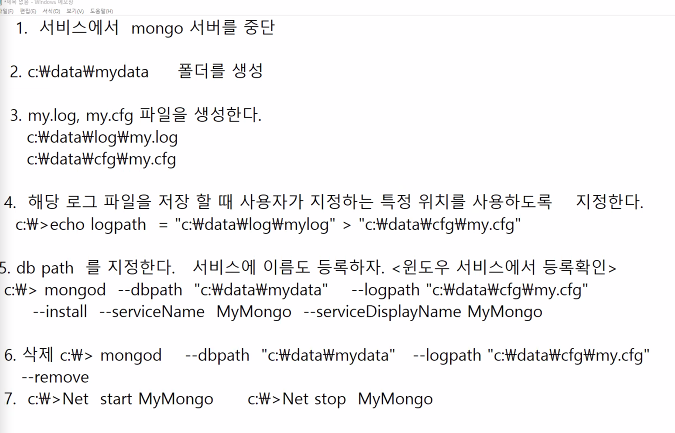

In [ ]:
db.createCollection("exam02");
db.getCollectionNames()  #[ "exam", "exam02" ]
db.my.insert({user_id:"aaa", age:23, status:"A"})
db.my.insert([{user_id:"bbb", age:30, status:"B"},
             {user_id:"ccc", age:35, status:"C"},
             {user_id:"ddd", age:35, status:"D"},
             {user_id:"eee", age:35, status:"E"},
             {user_id:"fff", age:35, status:"F"}]);
db.exam.insert({a:"a"})
db.exam.find()

db.exam02.stats()
db.printCollectionStats()
db.getCollectionInfos({name:"exam02"})

In [ ]:
# save
# _id를 지정하면 : 자료가 있으면 update, 자료가 없으면 insert
# _id를 지정하지 않으면 : insert와 같음

db.nums.save({num:100000})
db.nums.save({num:NumberInt(10000000)})
db.nums.save({num:NumberLong(10000)})
db.nums.find()

db.exam03.save({item:"book", qty:80})
db.exam03.find()
db.exam03.save({_id:1111, item:"book", qty:40})
db.exam03.find()
db.exam03.save({_id:1111, item:"book", qty:70})
db.exam03.insert({_id:1111, item:"book", qty:40})  # 오류남

https://bsonspec.org/spec.html

In [ ]:
db.nums.save({num:NumberInt(10000)})
db.nums.find({num:{$type:16}})  # "\x10" e_name int32

db.nums.save({num:NumberLong(10000)})
db.nums.find({num:{$type:18}})  # "\x12" e_name int64

db.nums.save({num:100000})
db.nums.save({num:98.9})
db.nums.find({num:{$type:1}})  # double

db.nums.save({num:new Date()})
db.nums.find({num:{$type:9}})  # ISODate

db.nums.save({num:new Date()+1})
db.nums.find({num:{$type:2}})  # string

typeof new Date()  # object
typeof new Date()+1  # object1

In [ ]:
db.my.find()
db.my.find({}, {user_id:1, age:1, status:1})
db.my.find({}, {_id:0, user_id:1, age:1, status:1})
db.my.find({}, {user_id:1, age:1})
db.my.find({}, {_id:0, user_id:1, age:1})

db.my.find({status:"A"})  # 조건문

db.my.find({status:"A"}, {_id:0, user_id:1, status:1})  # 조건문과 select

In [ ]:
db.my.updateOne(
   {user_id:"fff"},
   {$set:{status:"G"}}
)

db.my.updateMany(
   {age:{$gte:35}},
   {$set:{status:"K"}}
)

db.my.update({age:{$gt:25}},
             {$set:{status:"C"}},
             {multi:true});  # true가 디폴트, 1개만 바꾸려면 false

https://docs.mongodb.com/manual/reference/operator/query/type/

- count()
- distinct()
- sort() : -1(내림차순)
- limit()

In [ ]:
db.Score.insert({name:"aaa", kor:90, eng:80, mat:98, test:"midterm"})
db.Score.insert({name:"bbb", kor:100, eng:100, mat:76, test:"final"})
db.Score.insert({name:"ccc", kor:80, eng:55, mat:67, test:"midterm"})
db.Score.insert({name:"ddd", kor:70, eng:69, mat:89, test:"midterm"})
db.Score.insert({name:"eee", kor:60, eng:80, mat:78, test:"final"})
db.Score.insert({name:"fff", kor:100, eng:69, mat:89, test:"midterm"})
db.Score.insert({name:"ggg", kor:75, eng:100, mat:100, test:"final"})

db.Score.find()
db.Score.help()

db.Score.find({}, {name:1, mat:1, _id:0})
db.Score.find({mat:{$gte:70}})
db.Score.find({mat:{$gte:70}}, {name:1, mat:1, _id:0}).count()

var sr = db.Score.find({mat:{$gte:80}}, {name:1, mat:1, _id:0});
sr;  # 두 번 호출하면 안 나옴
print(sr)  # 값은 리턴해서 없지만 쿼리를 잡고있음
sr = null;
print(sr)  # 비워짐

In [ ]:
# Cursor 객체 : 아래 예시에서는 sr
var sr = db.Score.find({kor:{$gte:80}}, {name:1, kor:1, _id:0});
var tot = 0;
while(sr.hasNext()){
    res = sr.next();
    print(res.name + ":" + res.kor);
    tot += res.kor;
    print("tot = " + tot);
}
print("최종tot = " + tot);
sr.size()
sr.toArray()

https://docs.mongodb.com/manual/reference/method/js-cursor/

In [ ]:
# forEach
var sr02 = db.Score.find({kor:{$gte:80}}, {name:1, kor:1, _id:0});
sr02.forEach(
    function(x){
        print(x.name + ":" + x.kor);
    }
);


var sr03 = db.Score.find({kor:{$gte:80}}, {name:1, kor:1, _id:0});
var tot3 = 0;
sr03.forEach(
    function(x){
        print(x.name + ":" + x.kor);
        tot3 += x.kor;
    }
);
print("최종tot3 = " + tot3);


sr02.isClosed()
sr02.close()

In [ ]:
# forEach
db.Score.find({test:"midterm"}, {name:1, test:1, _id:0});
db.Score.find({test:{$eq:"midterm"}}, {name:1, test:1, _id:0});

var sm = db.Score.find();
sm.forEach(function(x){
    if(x.test == "midterm"){
        print(x.name + ":" + x.test);
    }
})

In [ ]:
# 이름이 a로 시작되거나 e로 시작되는 문서를 찾기
db.Score.find({name:/^a/}).count();
db.Score.find({$or:[{name:/^a/}, {name:/^e/}]});

In [ ]:
# distinct : 중복없이, 필드가 앞에 옴!
db.Score.distinct("test");
db.Score.distinct("name", {eng:{$gte:80}});

**리뷰 필요**  
https://docs.mongodb.com/manual/reference/method/db.collection.find/

In [ ]:
var myCursor = db.Score.find( );
var myDocument = myCursor.hasNext() ? myCursor.next() : null;
if (myDocument) {
    var myName = myDocument.name;
    print (tojson(myName));
};


if (myDocument) {
   var myName = myDocument.name;
   printjson(myName);
};


var myCursor = db.Score.find();
myCursor.forEach(printjson);


var myCursor = db.Score.find({}, {name:1, _id:0});
myCursor.forEach(printjson);

In [ ]:
# sort, limit, skip
db.Score.find({}, {name:1, test:1}).sort({name:1});
db.Score.find({}, {name:1, test:1}).sort({name:-1});

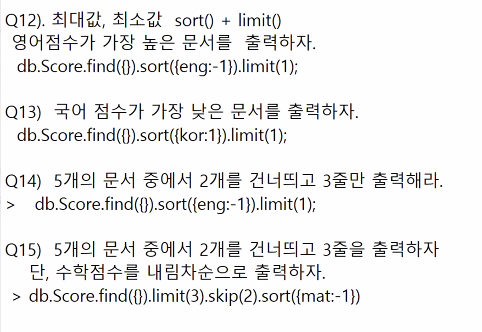

## 집계
1. aggregation
  - 일부처리는 샤드에 대응하고 있기 때문에 분산처리 가능

2. Map/Reduce
  - Aggregation 프레임워크에서 할 수 없는 복잡한 집계 작업을 수행
  - 샤드에 대응하고 있기 때문에 분산처리 가능

3. 미들웨어 시스템과 연계(하둡)
  - 더 큰 규모로 집계 처리할 때
  - 미들웨어 시스템(middleware system) = 분산환경 + 네트워크통신 + 응용프로그램과연계

**미들웨어 해봤니? 아주 작게는 몽고로 구축했는데, 몽고에 파이썬 라이브러리(응용프로그램)를 이용해서 구현, 또다른 미들웨어는 하둡을 이용해서 구현해봤다.

https://docs.mongodb.com/manual/reference/sql-aggregation-comparison/  
https://docs.mongodb.com/manual/core/map-reduce/

(참고)  
- 비정형(하둡) : json
- 반정형 : html, xml
- 정형(데이터웨어하우스)

In [ ]:
# aggregation
db.Product.find({}, {_id:0});

db.Product.aggregate([{
    $project:{_id:1, Price:1}
    }]);

db.Product.aggregate([{
    $project:{Price:1}
    }]);

db.Product.aggregate([{
    $project:{_id:0, Price:1}
    }]);      

db.Product.aggregate([{
    $project:{_id:0, Name:1, Price:1}
    }]);          

# 오름차순
db.Product.aggregate([
    {$project:{_id:0, Category:1, Price:1}},
    {$sort:{Price:1}}
    ]);    

# 내림차순
db.Product.aggregate([
    {$project:{_id:0, Category:1, Price:1}},
    {$sort:{Category:-1}}
    ]);         

# 별칭은 왼쪽에
db.Product.aggregate([
    {$project:{_id:0, 목록:"$Name", 가격:"$Price", 타입:"$Category"}}
    ]); 

# add
db.Product.aggregate([
    {$project:{_id:0, Name:1, 
               inc_price:{$add:["$Price", 100]}}}             
]);

In [ ]:
# group : _id 지정필수!

# max
db.Product.aggregate([
    {$group:{_id:"$Category", 최대가격:{$max:"$Price"}}}
]);

# min
db.Product.aggregate([
    {$group:{_id:"$Category", 최소가격:{$min:"$Price"}}}
]);

# 합, 평균, 갯수
db.Product.aggregate([
    {$group:{_id:"$Category", 
             가격합:{$sum:"$Price"}, 
             가격평균:{$avg:"$Price"},
             갯수:{$sum:1}}},
    {$sort:{가격합:1}}
]);

In [ ]:
# 갯수 구하기

# 첫번째 방법
db.Product.aggregate([
    {$group:{_id:"$Category",
             갯수:{$sum:1}}}
]);

# 두번째 방법
db.Product.aggregate([
    {$project:{Category:1, 갯수:{$literal:1}}},
    {$group:{_id:"$Category", count:{$sum:"$갯수"}}}             
]);

In [ ]:
# match : where문과 동일
db.Product.aggregate([
                      {$match:{Category:"food"}}
]);

db.Product.aggregate([
                      {$project:{_id:0, Name:1, Category:1}},
                      {$match:{Category:"food"}}
]);


db.Product.aggregate([
    {$match:{Category:"food"}},
    {$group:{_id:"$Category", 
             sum:{$sum:"$Price"},
             min:{$min:"$Price"}, 
             max:{$max:"$Price"},
             avg:{$avg:"$Price"},
             count:{$sum:1}}}
]);


# mapReduce로 변환
# map
function mymap(){ 
		emit(this.Category, {sum:this.Price, min:this.Price, max:this.Price, avg:this.Price, count:1})
  };

# reduce
function myreduce(key,value){ 
    var result = {Category:key, sum:0, min:100000, max:0, avg:0, count:0}
    value.forEach(function(x){   
        result.count += x.count; 
        result.sum += x.sum;
        result.min = Math.min(x.min, result.min);
        result.max = Math.max(x.max, result.max);      
        result.avg = result.sum/result.count;
    });
return result;
};

# mapReduce
db.Product.mapReduce(mymap, myreduce, {out:{replace:"myResult"}});
db.myResult.find({_id:"food"},{_id:0});

**mapReduce와 Aggregation 호환**  
https://docs.mongodb.com/manual/reference/map-reduce-to-aggregation-pipeline/

In [ ]:
db.Product.save({Name: "notebook", Price:200, Category:"material"});
db.Product.save({Name: "pencil", Price:80, Category:"material"});
db.Product.save({Name: "salad", Price:220, Category:"food"});
db.Product.save({Name: "others", Price:20, Category:"material"});
db.Product.save({Name: "bread", Price:100, Category:"food"});

# map : emit(key, value), 출력형식은 이거야~
function mymap(){ 
		emit(this.Category, {Category:this.Category, count:1, amount:this.Price})
  };

# reduce : var result, 집계방식은 이거야~ 
function myreduce(key,value){ 
    var result = {Category:key, count:0, amount:0}
    value.forEach(function(x){   
        result.count += x.count; 
        result.amount += x.amount;       
    });
 return result;
};

# mapReduce : 이름지정 replace
db.Product.mapReduce(mymap, myreduce, {out:{replace:"myResult"}});
db.myResult.find()

# 결과
{ "_id" : "material", "value" : { "Category" : "material", "count" : 3, "amount" : 300 } }
{ "_id" : "food", "value" : { "Category" : "food", "count" : 2, "amount" : 320 } }

In [ ]:
db.test01.insert([
{ "_id" : 1, "item" : "potato", "price" : 10, "quantity" : 2, "date" : ISODate("2014-01-01T08:00:00Z") },
{ "_id" : 2, "item" : "potato", "price" : 20, "quantity" : 1, "date" : ISODate("2014-02-03T09:00:00Z") },
{ "_id" : 3, "item" : "tomato", "price" : 5, "quantity" : 5, "date" : ISODate("2014-02-03T09:05:00Z") },
{ "_id" : 4, "item" : "tomato", "price" : 10, "quantity" : 10, "date" : ISODate("2014-02-15T08:00:00Z") },
{ "_id" : 5, "item" : "tomato", "price" : 5, "quantity" : 10, "date" : ISODate("2014-02-15T09:12:00Z") }])

# map
function mymap(){
    emit(this.item, {price:this.price, quantity:this.quantity})
};

# reduce
function myreduce(key,value){
    var result = {item:key, price:0, qtt:0 };
    value.forEach(function(x){
        result.price += x.price;
        result.qtt += x.quantity;
    })
    return result;
};

#mapReduce
db.test01.mapReduce(mymap, myreduce, {out:{replace:"myResult"}});
db.myResult.find();

# 결과
{ "_id" : "tomato", "value" : { "item" : "tomato", "price" : 20, "qtt" : 25 } }
{ "_id" : "potato", "value" : { "item" : "potato", "price" : 30, "qtt" : 3 } }

In [ ]:
# 평균구하기 1
db.Score.insert({name:"aaa", kor:90, eng:80, mat:98, test:"midterm"})
db.Score.insert({name:"bbb", kor:100, eng:100, mat:76, test:"final"})
db.Score.insert({name:"ccc", kor:80, eng:55, mat:67, test:"midterm"})
db.Score.insert({name:"ddd", kor:70, eng:69, mat:89, test:"midterm"})
db.Score.insert({name:"eee", kor:60, eng:80, mat:78, test:"final"})
db.Score.insert({name:"fff", kor:100, eng:69, mat:89, test:"midterm"})
db.Score.insert({name:"ggg", kor:75, eng:100, mat:100, test:"final"})

# map
function mymap(){
    emit(this.test, {kor:this.kor, mat:this.mat, Count:1})
    };

# reduce
function myreduce(key, value){
  var result = {test:key, kor:0, mat:0, Count:0}
  value.forEach(function(x){
      result.kor += x.kor; 
      result.mat += x.mat; 
      result.Count += x.Count;
      });
  return result;
};

# 함수 추가
var result2 = function(key, value2){
    value2.avg = value2.mat / value2.Count;
    return value2;
    };

# mapReduce : reduce함수 결과의 데이터를 또다시 가공할 때 finalize!
db.Score.mapReduce(mymap, myreduce, {out:{replace:"myResult"}, finalize:result2});
db.myResult.find();

# 결과
{ "_id" : "final", "value" : { "test" : "final", "kor" : 235, "mat" : 254, "Count" : 3, "avg" : 84.66666666666667 } }
{ "_id" : "midterm", "value" : { "test" : "midterm", "kor" : 340, "mat" : 343, "Count" : 4, "avg" : 85.75 } }

In [ ]:
# 평균구하기 2


# map
function mymap(){
    emit(this.test, {kor:this.kor, mat:this.mat, Count:1})
    };

# reduce
function myreduce(key, value){
  var result = {test:key, kor:0, mat:0, Count:0}
  value.forEach(function(x){
      result.kor += x.kor; 
      result.mat += x.mat; 
      result.Count += x.Count;
      });
      result.mat = result.mat/result.Count;
  return result;
};

# mapReduce
db.Score.mapReduce(mymap, myreduce, {out:{replace:"myResult"}});
db.myResult.find();

## 1이 2를 포함하고 2가 3을 포함하고... 포함관계
1. application: 동적 또는 정적 페이지가 있는 폴더명 ex)Test
2. context로 연동: url 매핑 ex)http://ip:port/Test/a.html 또는 http://ip:port/Test/b.jsp 에서의 Test
3. context 안에 여러개의 session: client가 접속한 순간 session 객체가 생성되고 server에 저장됨, client정보를 가지고 객체 생성, server는 이러한 client의 데이터를 로그데이터로 저장함 
4. Request 객체
5. webpage 객체: <- servlet <- jsp, html, img


(참고)Cookie 객체: client가 server에 접속하게 되면 그 접속정보를 client에 저장

## 몽고DB(몽고는 저장에 대한 개념보다는 bson으로 변환해서 통신을 원활하게 해주거나 MR/여기 붙여도되고 저기 붙여도되는 깍두기 같은 아이)의 위치

1. 하둡(저장의 개념) 전 : 몽고DB에서 원하는 데이터만 집계 후 하둡클러스터에 저장 후 하둡에서 MR작업 하거나 Spark에 던져줘서 거기서 MR작업

2. 하둡과 스파크(or 클라우드 or SQL/분석의 개념) 중간 : 데이터를 하둡에 저장 후 하둡에서 MR작업 후 키밸류를 뽑아와서 몽고DB에 저장 후 SQL데이터베이스로 저장하거나 Spark에 저장

(참고) Hive(하둡 근처에 붙이는 아이) : 비정형->정형 or 정형->비정형



## 지리 인덱스

https://docs.mongodb.com/manual/geospatial-queries/  
https://datatracker.ietf.org/doc/html/rfc7946#section-3.1

In [ ]:
# getIndexes
db.Product.aggregate([
                      {$project:{_id:0, Name:1}},
                      {$match:{Category:"bread"}}
]);
db.Product.getIndexes();

# 인덱스 추가설정
db.Product.ensureIndex({Name:1});
db.Product.getIndexes();

# 추가된 인덱스를 찾아서 실행결과를 확인
db.Product.find({Name:"bread"}).explain();

# 인덱스 삭제
db.Product.dropIndex({Name:1});
db.Product.getIndexes();

# 이름 순으로 정렬
db.Product.find().sort({Name:1});

# 실행결과 확인
db.Product.find({Name:"bread"}).explain();

In [ ]:
# GeoJSON
# 점 : $geometry:{type:"Point", coordinates:[40,5]}
# 직선 : $geometry:{type:"LineString", coordinates:[[40,5],[41,6]]}
# 다각형 : "Polygon"
{
  type: "Polygon",
  coordinates: [ [ [ 0 , 0 ] , [ 3 , 6 ] , [ 6 , 1 ] , [ 0 , 0  ] ] ]
}

# 집합 : "GeometryCollection"
{
  type: "GeometryCollection",
  geometries: [
     {
       type: "MultiPoint",
       coordinates: [
          [ -73.9580, 40.8003 ],
          [ -73.9498, 40.7968 ],
          [ -73.9737, 40.7648 ],
          [ -73.9814, 40.7681 ]
       ]
     },
     {
       type: "MultiLineString",
       coordinates: [
          [ [ -73.96943, 40.78519 ], [ -73.96082, 40.78095 ] ],
          [ [ -73.96415, 40.79229 ], [ -73.95544, 40.78854 ] ],
          [ [ -73.97162, 40.78205 ], [ -73.96374, 40.77715 ] ],
          [ [ -73.97880, 40.77247 ], [ -73.97036, 40.76811 ] ]
       ]
     }
  ]
}

In [ ]:
# 사각형 : $box
# 다각형 : $polygon
# 원형 : $center
# 지구 표면의 원형 : $centerSphere

In [ ]:
db.createCollection("location");
db.location.save({_id:"A", position:[0.001, -0.002]});
db.location.save({_id:"B", position:[1.0, 1.0]});
db.location.save({_id:"C", position:[0.5, 0.5]});
db.location.save({_id:"D", position:[-0.5, -0.5]});

db.location.ensureIndex({position:"2d"});

db.location.find({position:{$within:{$box:[[0.25,0.25],[1.0,1.0]]}}});
db.location.find({position:{$geoWithin:{$center:[[0,0], Math.sqrt(2)]}}});
db.location.find({position:{$near:[0,0], $maxDistance:0.75}});

In [ ]:
use geotest

var baseLng = 127.01145; 
var baseLat = 37.49101;

var diffLng = 126.984512;
var diffLat = 37.49555;

var categories = ['커피', '은행', '편의점'];

for(var i=1; i<=100; i++){
    var myLng = baseLng + (Math.random()*diffLng);
    var myLat = baseLat + (Math.random()*diffLat);

    var myCategories = categories[Math.floor(Math.random()*categories.length)];
                                             
    db.places.save({location:[myLng,myLat],
                    category:myCategories});
};


db.places.getIndexes();
db.places.ensureIndex({location:"2d", category:1});
try {
   db.places.deleteMany({location:{$gt:180}});
} catch (e) {
   print (e);
}
db.places.ensureIndex({location:"2d", category:1});
db.places.getIndexes();

db.places.find({category:"편의점"});
db.places.find({location:{$near:[126.89, 37.48]}}).limit(10);

{ "_id" : ObjectId("60c80be0d570b54e5507e58b"), "location" : [ 127.40663040146865, 65.02290889884428 ], "category" : "커피" }
db.places.find({location:{$within:{$center:[[ 127.40663040146865, 65.02290889884428 ], 0.25] }}})

https://docs.mongodb.com/database-tools/installation/installation-windows/  
https://www.mongodb.com/try/download/database-tools?tck=docs_databasetools  
msi로 설치  
C:\Program Files\MongoDB\Tools\100\bin  

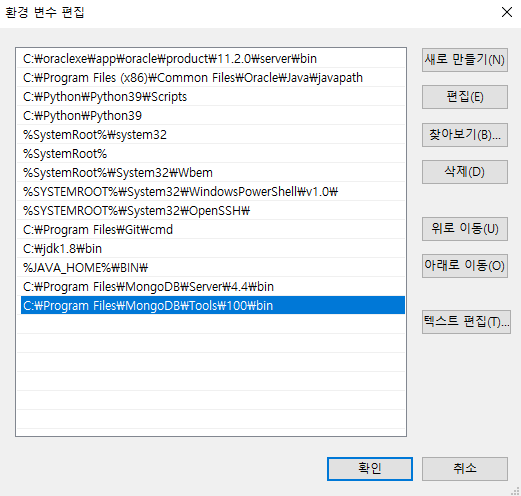

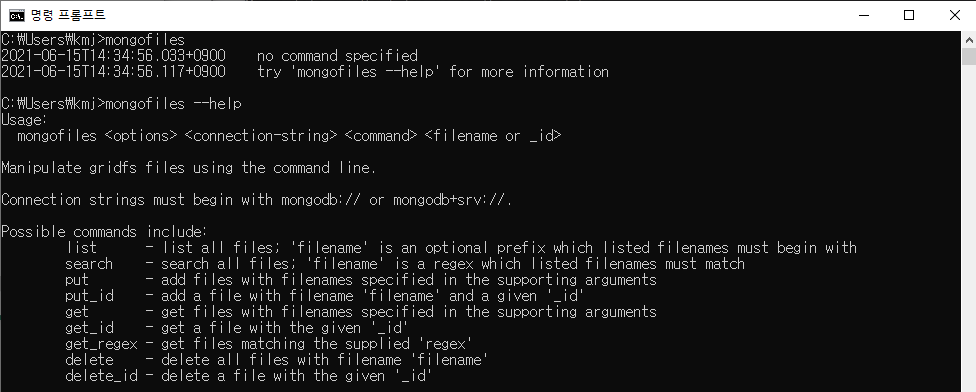

In [ ]:
cd\
cd test
dir/w
dir *.txt

- MongoDB : 저장할 수 있는 문서의 크기는 16MB
- GridFS : 16MB 이상의 데이터를 분할해서 입출력하기 위한 인터페이스

https://docs.mongodb.com/v4.2/core/gridfs/

In [ ]:
# DB(images)에 이미지파일 등 올리기
mongofiles -v -d images put chicken.jpg
mongofiles -v -d images put omelet.jpg
mongofiles -v -d images put rib.jpg
mongofiles -v -d images put a.txt
mongofiles -v -d images put b.txt
mongofiles -v -d images put video.mp4

dir
type c.json
mongofiles -v -d images put c.json

mongo
use images
db
show collections
db.fs.files.find();
db.fs.chunks.find({files_id:ObjectId("60c84074381ea70bd0300f7a")});
db.fs.chunks.find({files_id:ObjectId("60c84e5102b178c28f3059cf")},{data:0});

mongofiles -v -d images list
mongofiles -v -d images get c.json
mongofiles -v -d images search chicken
mongofiles -v -d images search json
mongofiles -v -d images delete chicken.jpg
mongofiles -v -d images list

use images
db.fs.files.getIndexes();
db.fs.chunks.stats();

In [ ]:
# jsonSchema
db.createCollection("students", {
   validator: {
      $jsonSchema: {
         bsonType: "object",
         required: [ "name", "year", "major", "address" ],
         properties: {
            name: {
               bsonType: "string",
               description: "must be a string and is required"
            },
            year: {
               bsonType: "int",
               minimum: 2017,
               maximum: 3017,
               description: "must be an integer in [ 2017, 3017 ] and is required"
            },
            major: {
               enum: [ "Math", "English", "Computer Science", "History", null ],
               description: "can only be one of the enum values and is required"
            },
            gpa: {
               bsonType: [ "double" ],
               description: "must be a double if the field exists"
            },
            address: {
               bsonType: "object",
               required: [ "city" ],
               properties: {
                  street: {
                     bsonType: "string",
                     description: "must be a string if the field exists"
                  },
                  city: {
                     bsonType: "string",
                     description: "must be a string and is required"
                  }
               }
            }
         }
      }
   }
})


db.students.validate();
db.students.getDB();

In [ ]:
db.createCollection( "contacts",
   { validator: { $or:
      [
         { phone: { $type: "string" } },
         { email: { $regex: /@mongodb\.com$/ } },
         { status: { $in: [ "Unknown", "Incomplete" ] } }
      ]
   }
} )

# id 2번은 insert 안 됨
db.contacts.insert([
   { "_id": 1, "name": "Anne", "phone": "+1 555 123 456", "city": "London", "status": "Complete" },
   { "_id": 2, "name": "Ivan", "city": "Vancouver" }
])


# 스키마 추가
db.runCommand( {
   collMod: "contacts",
   validator: { $jsonSchema: {
      bsonType: "object",
      required: [ "phone", "name" ],
      properties: {
         phone: {
            bsonType: "string",
            description: "must be a string and is required"
         },
         name: {
            bsonType: "string",
            description: "must be a string and is required"
         }
      }
   } },
   validationLevel: "moderate"
} )

# id 4번은 insert 안 됨
db.contacts.insert([
   { "_id": 3, "name": "Anne", "phone": "+1 555 123 456", "city": "London", "status": "Complete" },
   { "_id": 4, "name": "Ivan", "city": "Vancouver" }
])


**Model Tree**  
https://docs.mongodb.com/manual/tutorial/model-tree-structures-with-parent-references/